DECISION CLASSIFICATION TREE WITH PYTHON AND SCIKIT-LEARN



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
import category_encoders as ce
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/Pythonprog.py/hepatitis.data.csv', header=None, na_values='?')

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,155.0,1.793548,0.406070,1.0,2.00,2.0,2.00,2.0
1,155.0,41.200000,12.565878,7.0,32.00,39.0,50.00,78.0
2,155.0,1.103226,0.305240,1.0,1.00,1.0,1.00,2.0
3,154.0,1.506494,0.501589,1.0,1.00,2.0,2.00,2.0
4,155.0,1.845161,0.362923,1.0,2.00,2.0,2.00,2.0
5,154.0,1.350649,0.478730,1.0,1.00,1.0,2.00,2.0
6,154.0,1.603896,0.490682,1.0,1.00,2.0,2.00,2.0
7,154.0,1.792208,0.407051,1.0,2.00,2.0,2.00,2.0
8,145.0,1.827586,0.379049,1.0,2.00,2.0,2.00,2.0
9,144.0,1.583333,0.494727,1.0,1.00,2.0,2.00,2.0


In [5]:
data.isnull().sum()

0      0
1      0
2      0
3      1
4      0
5      1
6      1
7      1
8     10
9     11
10     5
11     5
12     5
13     5
14     6
15    29
16     4
17    16
18    67
19     0
dtype: int64

In [6]:
data.isnull().sum()

0      0
1      0
2      0
3      1
4      0
5      1
6      1
7      1
8     10
9     11
10     5
11     5
12     5
13     5
14     6
15    29
16     4
17    16
18    67
19     0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       155 non-null    int64  
 1   1       155 non-null    int64  
 2   2       155 non-null    int64  
 3   3       154 non-null    float64
 4   4       155 non-null    int64  
 5   5       154 non-null    float64
 6   6       154 non-null    float64
 7   7       154 non-null    float64
 8   8       145 non-null    float64
 9   9       144 non-null    float64
 10  10      150 non-null    float64
 11  11      150 non-null    float64
 12  12      150 non-null    float64
 13  13      150 non-null    float64
 14  14      149 non-null    float64
 15  15      126 non-null    float64
 16  16      151 non-null    float64
 17  17      139 non-null    float64
 18  18      88 non-null     float64
 19  19      155 non-null    int64  
dtypes: float64(15), int64(5)
memory usage: 24.3 KB


In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [9]:
data.fillna(data.mean(), inplace=True)

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1.000000,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,2,50,1,1.000000,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,2,78,1,2.000000,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,2,31,1,1.506494,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,2,34,1,2.000000,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1


In [11]:
data.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data.columns = [
    'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 
    'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 
    'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime', 'Histology', 'Class'
]
print(data.columns)

Index(['Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia',
       'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites',
       'Varices', 'Bilirubin', 'Alk Phosphate', 'Sgot', 'Albumin', 'Protime',
       'Histology', 'Class'],
      dtype='object')


In [14]:
x = data.drop(['Class'], axis=1)
y = data['Class']

In [15]:
# split x and y into training and testing set
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.35, random_state=42)

In [16]:
# Check the shape of x_train and x_test 
X_train.shape, X_test.shape

((100, 19), (55, 19))

In [17]:
# check the data type in x_train
X_train.dtypes

Age                  int64
Sex                  int64
Steroid              int64
Antivirals         float64
Fatigue              int64
Malaise            float64
Anorexia           float64
Liver Big          float64
Liver Firm         float64
Spleen Palpable    float64
Spiders            float64
Ascites            float64
Varices            float64
Bilirubin          float64
Alk Phosphate      float64
Sgot               float64
Albumin            float64
Protime            float64
Histology          float64
dtype: object

In [18]:
X_train.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
32,2,41,2,2.0,1,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,81.000000,53.0,5.0,74.000000
134,1,38,1,1.0,2,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.4,243.000000,49.0,3.8,90.000000
143,1,49,1,1.0,2,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.4,85.000000,70.0,3.5,35.000000
67,1,57,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,4.1,105.325397,48.0,2.6,73.000000
16,2,66,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.2,102.000000,53.0,4.3,61.852273


In [19]:
X_test.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,Sgot,Albumin,Protime,Histology
81,2,36,1,2.0,2,2.0,2.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.0,0.700000,62.000000,224.00000,4.200000,100.000000
142,2,51,1,2.0,2,1.0,2.0,2.0,2.000000,1.000000,1.0,1.0,2.0,1.0,1.000000,105.325397,20.00000,3.000000,63.000000
31,1,62,1,1.0,2,1.0,1.0,2.0,1.827586,1.583333,2.0,2.0,2.0,2.0,1.000000,105.325397,60.00000,3.817266,61.852273
29,2,51,1,1.0,1,1.0,1.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.0,1.000000,78.000000,58.00000,4.600000,52.000000
118,1,61,1,1.0,2,1.0,1.0,2.0,1.827586,1.583333,2.0,1.0,2.0,2.0,1.427517,105.325397,85.89404,3.817266,61.852273


In [20]:
from sklearn.tree import DecisionTreeClassifier

Decision Tree Classsifier with crieterion Gini Index

In [21]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

# fit the classsifier
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

Predict the Test set results with criterion gini index

In [22]:
y_pred_gini = clf_gini.predict(X_test)

In [23]:
print('Model Accuracy Score with criterion gini Index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model Accuracy Score with criterion gini Index: 0.6545


Compare the train-set and test-set accuracy

In [24]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2])

In [25]:

print("Training set accuracy score: {0:0.4f}".format(accuracy_score(y_train,y_pred_train_gini)))

Training set accuracy score: 0.7800


Check Overfitting and underfitting

In [26]:
print('Training set score: {:4f}'.format(clf_gini.score(X_train,y_train)))
print('Testing set score: {:4f}'.format(clf_gini.score(X_test,y_test)))

Training set score: 0.780000
Testing set score: 0.654545


Decision Tree classifier with criterion entropy

In [27]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

#fit model
clf_en.fit(X_test,y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

Predict the Test set results with criterion entrpy index

In [28]:
y_pred_clf_en = clf_en.predict(X_test)

y_pred_clf_en

array([1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1])

In [29]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test,y_pred_clf_en)))

Model accuracy score with criterion entropy: 0.8364


Compare the train set and test set accuracy

In [30]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array([1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2])

Check the Overfitting and Underfitting

In [31]:
#print the train and test score

print('Train set score: {:4f}'.format(clf_en.score(X_train,y_train)))

print('test set score: {:4f}'.format(clf_en.score(X_test,y_test)))

Train set score: 0.630000
test set score: 0.836364


In [32]:
#confucion matrix

cm = confusion_matrix(y_test,y_pred_clf_en)

print('Confusion matrix\n\n',cm)

Confusion matrix

 [[31  2]
 [ 7 15]]


Classification report

In [33]:
print(classification_report(y_test,y_pred_clf_en))

              precision    recall  f1-score   support

           1       0.82      0.94      0.87        33
           2       0.88      0.68      0.77        22

    accuracy                           0.84        55
   macro avg       0.85      0.81      0.82        55
weighted avg       0.84      0.84      0.83        55



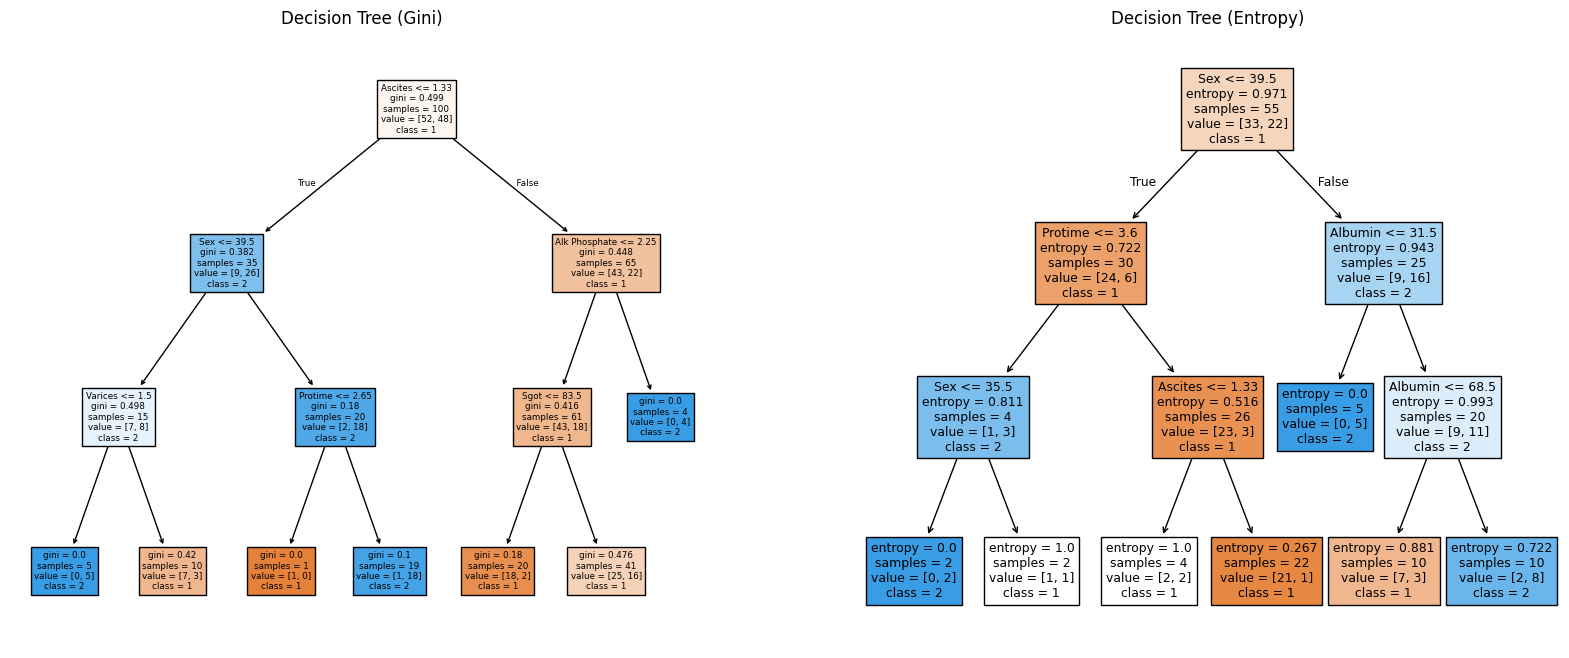

In [34]:
#visualize the model
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 8))

# Plot Gini-based tree
plt.subplot(1, 2, 1)
plot_tree(clf_gini, feature_names=X_train.columns, class_names=['1', '2'], filled=True)
plt.title("Decision Tree (Gini)")

# Plot Entropy-based tree
plt.subplot(1, 2, 2)
plot_tree(clf_en, feature_names=X_train.columns, class_names=['1', '2'], filled=True)
plt.title("Decision Tree (Entropy)")

plt.show()
